# Sequential Prediction: GRUs and LSTMs

We keep diving into the Recurrent Neural Networks. We will learn about more advanced techniques to handle long term dependencies, and more types of RNN!

# I. Translation Machine

## I.1 How to translate a sentence?

The most intuitive way to translate a sentence would be to use one of the RNN types we saw yesterday: the many-to-many:
![](images/many-to-many.png)

So the idea is that you take a sentence in english:
> `My name is Cassidy.`

If we have a well trained network, this should word :
The first word `My` is given as input, and outputs `Mon`.

The second word `name` outputs `nom`, `is` outputs `est`, and finally `Cassidy` outputs `Cassidy`. Our translation will be 
> `Mon nom est Cassidy.`


Alright, let's think about it a bit more: would it work every time doing that way?

## I.2 Swapping words issue

Now let's consider the following sentence, and let's do the same exercise:
> `What is your favorite movie?`

The translation now would be the following:
> `Quel est ton préféré film ?`

This is really **not good**, we want the following translation:
> `Quel est ton film préféré ?`


Because english and french do not always order the same adjectives and nouns.

How to deal with that problem? The neural network (and even a human!) actually has to know that both words `favorite` and `movie` have to be translated!

When you human, want to translate a sentence, don't you read it all first? Then let's give our RNN a chance to do the same! This would give the following architecture:

![](images/many-to-many_translation.png)


What does this architecture mean? Well we have two sides.

The left side, we feed our RNN with the sequence of words in english. So that the RNN has a chance to "read" **all the sequence** before making any translation. Just like a human does!

The right side is a bit trickier. Once all the sentence has been read, the RNN begins to predict translation. So it begins by predicting the first word, the same way we did up to now.

Then, the predicted word is fed as input to predict the next word. Indeed, the **RNN uses the previous predicted word to predict the next one**!

This architecture is sometimes called an **encoder-decoder sequence-to-sequence** model.

## I.3 Long term dependencies

Finally, let's look at a final translation example. We want to translate this sentence
> `Cats, unlike my dog, don't like water.`

Into this one:
> `Les chats, contrairement à mon chien, n'aiment pas l'eau.`

How would perform our new architecture on that sentence? Quite good, but for sure it would **miss the plural agreement** and give the following translation:
> `Les chats, contrairement à mon chien, n'aime pas l'eau.`

Indeed, our RNN would predict `n'aime pas` based on `mon chien` right before. While actually, it should remember that it is related to `Les chats` a long time ago...

This is the problem of **long-term dependencies**. To manage them, we would like to **keep memory** of the past.

# II. Memory Cells

## II.1 RNN Cell structure

We will change our representation now, so as a reminder, here is how we could see a RNN cell:
![](images/RNN_cell.png)

Where we find back what we already know:
- The hidden state $h_t$ is computed using $h_{t-1}$ and $x_t$
- The prediction $\hat{y}$ is computed using $h_t$

Nothing new for now!

## II.2 Gated Recurrent Unit structure

In order to keep memory of older state, the first idea was to create an **update gate** usually noted $\Gamma_u$. This is a **Gated Recurrent Unit** (often called **GRU**) 

The idea of this update gate is to have a variable that says how much information from the past step we should keep.

The structure would be the following:

![](images/GRU_cell.png)

As you can see on the diagram, the update gate is computed using the sigmoid function, using the same inputs as a regular RNN:

$$
\large \Gamma_u = sigmoid(W_{hu} h_{t-1} + W_{xu} X_t + b_u)
$$

This value $\Gamma_u$ can really be seen as a gate:
* If $\Gamma_u = 1$, completely forget the previous state
* If $\Gamma_u = 0$, do not update at all, keep only the previous state

This should allow our network to remember information on longer sequences.

For those who want to full mathematics behind, here they are:

$$
\hat{h_t} = g(W_{hh} \Gamma_r h_{t-1} + W_{xh} X_t + b_h)
$$

$$
 \Gamma_u = sigmoid(W_{hu} h_{t-1} + W_{xu} X_t + b_u)
$$

$$
 \Gamma_r = sigmoid(W_{hr} h_{t-1} + W_{xr} X_t + b_r)
$$

$$
 \hat{h_t} = \Gamma_u \hat{h_t} + (1-\Gamma_u)h_{t-1}
$$

Where $\Gamma_r$ can be seen as a relevance gate.

**No worries**, as usual, all of this is **already coded in TensorFlow**, all you will have to do is:
```Python
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import GRU

model = Sequential()
model.add(GRU(units=16))
```

## II.3 Long Short-Term Memory Cell 

Historically, before creating GRU, Long Short-Term Memory (LSTM) cells were invented. They are even more complex than GRU.

LSTM cells allow to keep information over longer sequences than GRU cells. The drawback is that they have much more parameters, and are thus harder to train: **LSTMs need a larger training dataset**!

A GRU cell can be seen a binary update gate: you can either keep all the past information, or rely only on current information. (Even though it is more a threshold that can keep half past and half current information.)

A LSTM offers much more liberty: you can either keep all past information **and** all current information.

The structure is the following:

![](images/LSTM_cell.png)

The structure seems now very complicated, let's have a look!

We still have the update gate that keeps working the same:

$$
\Gamma_u = sigmoid(W_{hu} h_{t-1} + W_{xu} X_t + b_u)
$$

And there is now the **forget gate** $\Gamma_f$ that is computed the same way (with different weights of course!):

$$
\Gamma_f = sigmoid(W_{hf} h_{t-1} + W_{xf} X_t + b_f)
$$

And we still compute an intermediary state, called now $\hat{c}$ instead of $\hat{h}$ before, but this is pretty much the same for the moment:

$$
\hat{c_t} = g(W_{hc} \Gamma_r h_{t-1} + W_{xc} X_t + b_c)
$$

There is a new player now, the **cell state** $c_t$, that is computed thanks to the update gate, the forget gate and the current state:

$$
c_t = \Gamma_f c_{t-1} + \Gamma_u \hat{c}_t
$$

Finally, there is one more gate computed like other gates, the **output gate** $\Gamma_o$:

$$
\Gamma_o = sigmoid(W_{ho} h_{t-1} + W_{xo} X_t + b_o)
$$

That allows to compute the final hidden state $h_t$:

$$
h_t = \Gamma_o c_t
$$

Like the GRU, the LSTM is **coded in TensorFlow**, all you will have to do is:
```Python
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(units=16))
```

# III. Application to weather forecast

Let's use GRUs to predict the weather of SF, given in the `San_Francisco.csv` file.

Have a look at the data, clean it if needed.

Then as you did for the stock forecast, you will need to compute the `X` and `y` data.

`X` will be all the features you kept, of the past half day for example (the number of past hours can be modified). `y` will be the temperature of the current hour.

Before building and training your model, do not forget to rescale and split the dataset. 

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('San_Francisco.csv')
df = df.dropna()
print(df.shape)
df.head()

(44304, 7)


,datetime,Humidity,Pressure,Temperature,Description,Wind direction,Wind speed
1,2012-10-01 13:00:00,88.0,1009.0,289.480000,light rain,150.0,2.0
2,2012-10-01 14:00:00,87.0,1009.0,289.474993,sky is clear,147.0,2.0
3,2012-10-01 15:00:00,86.0,1009.0,289.460618,sky is clear,141.0,2.0
4,2012-10-01 16:00:00,85.0,1009.0,289.446243,sky is clear,135.0,2.0
5,2012-10-01 17:00:00,84.0,1009.0,289.431869,sky is clear,129.0,2.0


Let's keep the features: Humidity, Pressure, Temperature, Wind direction and Wind speed, and then prepare the data.

In [2]:
data = df[['Humidity', 'Pressure', 'Temperature', 'Wind direction', 'Wind speed']]

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [4]:
def processData(data, past):
    X,Y = [],[]
    for i in range(len(data)-past):
        X.append(data[i:i+past, 1:6])
        Y.append(data[i+past, 2])

    return np.array(X),np.array(Y)


lookback = 12 #here in hours

X, y = processData(data_scaled, lookback)
X.shape, y.shape

((44292, 12, 4), (44292,))

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=False)

Finally build and train a model:

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding, Dropout

def my_GRU():

    model = Sequential()
    model.add(GRU(units=32, return_sequences=True, input_shape=(lookback,4)))
    model.add(GRU(units=32, return_sequences=True))
    model.add(GRU(units=32, return_sequences=False))

    model.add(Dense(units=1, activation='linear'))

    return model

model = my_GRU()

model.compile(optimizer='adam',
              loss='mean_squared_error')


model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Train on 35433 samples, validate on 8859 samples
Epoch 1/10
35433/35433 [==============================] - 22s 635us/sample - loss: 0.0726 - val_loss: 0.0293
Epoch 2/10
35433/35433 [==============================] - 17s 474us/sample - loss: 0.0323 - val_loss: 0.0273
Epoch 3/10
35433/35433 [==============================] - 17s 473us/sample - loss: 0.0300 - val_loss: 0.0274
Epoch 4/10
35433/35433 [==============================] - 17s 473us/sample - loss: 0.0291 - val_loss: 0.0252
Epoch 5/10
35433/35433 [==============================] - 17s 484us/sample - loss: 0.0280 - val_loss: 0.0241
Epoch 6/10
35433/35433 [==============================] - 18s 497us/sample - loss: 0.0277 - val_loss: 0.0243
Epoch 7/10
35433/35433 [==============================] - 19s 526us/sample - loss: 0.0274 - val_loss: 0.0242
Epoch 8/10
35433/35433 [==============================] - 18s 499us/sample - loss: 0.0272 - val_loss: 0.0246
Epoch 9/10
35433/35433 [==============================] - 18s 499us/sample - lo

Let's check what the model has learnt: we will predict on the test data, and compare the values to the ground truth:

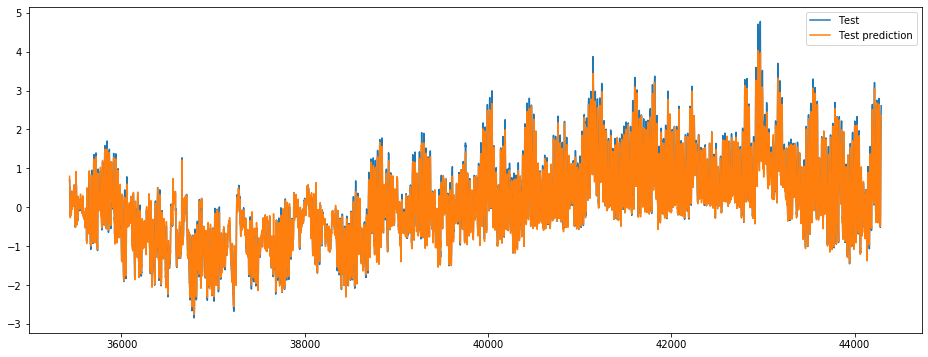

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
#plt.plot(np.arange(len(X_train)), y_train, label='Train')
plt.plot(np.arange(len(X_train), len(X_train)+len(X_test), 1), y_test, label='Test')
plt.plot(np.arange(len(X_train), len(X_train)+len(X_test), 1), model.predict(X_test), label='Test prediction')
plt.legend()
plt.show()

# IV. Generation with RNNs

## IV.1 Generative RNNs

Up to now you have seen some types of RNNs, especially you know there is many-to-many and many-to-one.
![](images/RNN_types.png)

How to implement those cases with TensorFlow?

With the parameter `return_sequences`:
- When you set `return_sequences = False` to the last layer of your RNN, it won't return anything: thus this is a many-to-one.
- When you set `return_sequences = True` to the last layer of your RNN, it will return an output prediction for each step: this is a many-to-many. Then you have to add a `TimeDistributed` layer to apply for example a softmax to each time step.

Well, there are more types of RNNs, you already saw the translation one (the encoder-decoder sequence-to-sequence model), a many-to-many with shift.

You can also do a **One-to-Many** RNN:
![](images/one-to-many.png)

This can be used for example in music generation! Or any type of sequence generation!

This kind of generative networks is actually a bit different than others:
- During the training phase you **train them like** a classical **many-to-many network**
- Then during the generative phase only, you reinject the output of each time step as input of the next time step